<a href="https://colab.research.google.com/github/busung/data-analysis-by-EDA/blob/main/6_%EC%9D%B4%EA%B3%BC%EA%B0%80_%EB%AC%B8%EA%B3%BC%EB%B3%B4%EB%8B%A4_%EC%B7%A8%EC%97%85%EC%9D%84_%EC%9E%98_%ED%95%98%EB%8A%94%EA%B0%80%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이과는 정말 문과보다 취업을 잘 할까?
* 이과란? 공학+자연계열만을
* 문과란? 인문+사회계열만을
  * 전문계열(교육,의약은 전문직으로 현재 논하는 이과의 문과의 취업률과는 별개의 영역으로 취급)
  * 취업자란? 교내 + 교외 + 해외 취업자(프래린서 혹은 농업,자영업 등은 일반적인 취업과는 다르기 때문)
* 필요한 데이터
  * 연도별 계열별 취업 데이터

In [1]:
import pandas as pd

In [2]:
!sudo apt install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]

fm._rebuild()

# plt.style.use("seaborn-whitegrid")

path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc("font", family=font_name)
plt.rc('axes', unicode_minus=False)

#데이터 불러오기

In [4]:
grd_2013 = pd.read_csv("/content/Ⅰ-1-2. 2013년 졸업자 하반기 계열별 졸업상황(총괄).CSV",encoding = "euc-kr")
grd_2014 = pd.read_csv("/content/Ⅰ-1-2. 2014년 졸업자 하반기 계열별 졸업상황(총괄).CSV",encoding = "euc-kr")
grd_2015 = pd.read_csv("/content/1-1-2_2015년 졸업자 계열별 졸업상황(총괄).CSV",encoding = "euc-kr")
grd_2016 = pd.read_csv("/content/1-1-2_2016년 졸업자 계열별 졸업상황.csv",encoding = "euc-kr")

In [5]:
grd_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   구분                52 non-null     object 
 1   졸업자_계             52 non-null     int64  
 2   졸업자_여             52 non-null     int64  
 3   건강보험및국세DB연계취업률_계  52 non-null     float64
 4   건강보험및국세DB연계취업률_여  52 non-null     float64
 5   취업자_계             52 non-null     int64  
 6   취업자_여             52 non-null     int64  
 7   건강보험가입취업자_계       52 non-null     int64  
 8   건강보험가입취업자_여       52 non-null     int64  
 9   건강보험가입교내취업자_계     52 non-null     object 
 10  건강보험가입교내취업자_여     52 non-null     object 
 11  해외취업자_계           52 non-null     object 
 12  해외취업자_여           52 non-null     object 
 13  영농업종사자_계          52 non-null     object 
 14  영농업종사자_여          52 non-null     object 
 15  개인창작활동종사자_계       52 non-null     object 
 16  개인창작활동종사자_여       52 non-null     object 
 17 

In [6]:
grd_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   구분                53 non-null     object 
 1   졸업자_계             53 non-null     int64  
 2   졸업자_여             53 non-null     int64  
 3   건강보험및국세DB연계취업률_계  53 non-null     float64
 4   건강보험및국세DB연계취업률_여  53 non-null     float64
 5   취업자_계             53 non-null     int64  
 6   취업자_여             53 non-null     int64  
 7   건강보험가입취업자_계       53 non-null     int64  
 8   건강보험가입취업자_여       53 non-null     int64  
 9   건강보험가입교내취업자_계     53 non-null     object 
 10  건강보험가입교내취업자_여     53 non-null     object 
 11  해외취업자_계           53 non-null     object 
 12  해외취업자_여           53 non-null     object 
 13  농림어업종사자_계         53 non-null     object 
 14  농림어업종사자_여         53 non-null     object 
 15  개인창작활동종사자_계       53 non-null     object 
 16  개인창작활동종사자_여       53 non-null     object 
 17 

In [7]:
grd_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   구분                   53 non-null     object 
 1   졸업자_계                53 non-null     int64  
 2   졸업자_남                53 non-null     int64  
 3   졸업자_여                53 non-null     int64  
 4   건강보험 및 국세DB연계 취업률_계  53 non-null     float64
 5   건강보험 및 국세DB연계 취업률_남  53 non-null     float64
 6   건강보험 및 국세DB연계 취업률_여  53 non-null     float64
 7   취업자_합계               53 non-null     int64  
 8   취업자_남                53 non-null     int64  
 9   취업자_여                53 non-null     int64  
 10  건강보험가입취업자_계          53 non-null     int64  
 11  건강보험가입취업자_남          53 non-null     object 
 12  건강보험가입취업자_여          53 non-null     int64  
 13  건강보험가입교내취업자_계        53 non-null     object 
 14  건강보험가입교내취업자_남        53 non-null     object 
 15  건강보험가입교내취업자_여        53 non-null     objec

In [8]:
grd_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   구분                   53 non-null     object 
 1   졸업자_계                53 non-null     int64  
 2   졸업자_남                53 non-null     int64  
 3   졸업자_여                53 non-null     int64  
 4   건강보험 및 국세DB연계 취업률_계  53 non-null     float64
 5   건강보험 및 국세DB연계 취업률_남  53 non-null     float64
 6   건강보험 및 국세DB연계 취업률_여  53 non-null     float64
 7   취업자_합계               53 non-null     int64  
 8   취업자_남                53 non-null     int64  
 9   취업자_여                53 non-null     int64  
 10  건강보험가입교외취업자_계        53 non-null     int64  
 11  건강보험가입교외취업자_남        53 non-null     int64  
 12  건강보험가입교외취업자_여        53 non-null     int64  
 13  건강보험가입교내취업자_계        53 non-null     object 
 14  건강보험가입교내취업자_남        53 non-null     object 
 15  건강보험가입교내취업자_여        53 non-null     objec

#연도별 이과 문과 취업률 차이

##데이터 전처리

In [9]:
grd_2013.set_index(['구분'],inplace=True)
data_2013 = pd.DataFrame(grd_2013.filter(regex='자연',axis='index').iloc[0])
list_ = ['공학','인문','사회',]
for i in list_:
  temp = pd.DataFrame(grd_2013.filter(regex=i,axis='index').iloc[0])
  data_2013 = pd.concat([data_2013,temp],axis=1)

data_2013=data_2013.T
data_2013.reset_index(inplace=True)
data_2013.index = ['2013' for i in range(4)]
data_2013=data_2013[['index','졸업자_계','취업자_계','건강보험가입취업자_계','건강보험가입교내취업자_계','해외취업자_계']]
data_2013.columns = ['계열','졸업자','취업자','교외취업자','교내취업자','해외']

In [10]:
grd_2014.set_index(['구분'],inplace=True)
data_2014 = pd.DataFrame(grd_2014.filter(regex='자연',axis='index').iloc[0])
list_ = ['공학','인문','사회',]
for i in list_:
  temp = pd.DataFrame(grd_2014.filter(regex=i,axis='index').iloc[0])
  data_2014 = pd.concat([data_2014,temp],axis=1)

data_2014=data_2014.T
data_2014.reset_index(inplace=True)
data_2014.index = ['2014' for i in range(4)]
data_2014 = data_2014[['index','졸업자_계','취업자_계','건강보험가입취업자_계','건강보험가입교내취업자_계','해외취업자_계']]
data_2014.columns = ['계열','졸업자','취업자','교외취업자','교내취업자','해외']

In [11]:
grd_2015.set_index(['구분'],inplace=True)
data_2015 = pd.DataFrame(grd_2015.filter(regex='자연',axis='index').iloc[0])
list_ = ['공학','인문','사회',]
for i in list_:
  temp = pd.DataFrame(grd_2015.filter(regex=i,axis='index').iloc[0])
  data_2015 = pd.concat([data_2015,temp],axis=1)

data_2015=data_2015.T
data_2015.reset_index(inplace=True)
data_2015.index = ['2015' for i in range(4)]
data_2015=data_2015[['index','졸업자_계','취업자_합계','건강보험가입취업자_계','건강보험가입교내취업자_계','해외취업자_계']]
data_2015.columns = ['계열','졸업자','취업자','교외취업자','교내취업자','해외']

In [12]:
grd_2016.set_index(['구분'],inplace=True)
data_2016 = pd.DataFrame(grd_2016.filter(regex='자연',axis='index').iloc[0])
list_ = ['공학','인문','사회',]
for i in list_:
  temp = pd.DataFrame(grd_2016.filter(regex=i,axis='index').iloc[0])
  data_2016 = pd.concat([data_2016,temp],axis=1)

data_2016=data_2016.T
data_2016.reset_index(inplace=True)
data_2016.index = ['2016' for i in range(4)]
data_2016=data_2016[['index','졸업자_계','취업자_합계','건강보험가입교외취업자_계','건강보험가입교내취업자_계','해외취업자_계']]
data_2016.columns = ['계열','졸업자','취업자','교외취업자','교내취업자','해외']

In [13]:
final_data = pd.concat([data_2013,data_2014,data_2015,data_2016])
final_data.reset_index(inplace=True)
final_data=final_data.rename(columns={'index':'년도'})

final_data['교외취업자']=pd.to_numeric(final_data['교외취업자'])
final_data['교내취업자']=pd.to_numeric(final_data['교내취업자'])
final_data['해외']=pd.to_numeric(final_data['해외'])
final_data['졸업자']=pd.to_numeric(final_data['졸업자'])
final_data['취업자']=final_data['교외취업자']+final_data['교내취업자']+final_data['해외']
final_data

,년도,계열,졸업자,취업자,교외취업자,교내취업자,해외
0,2013,자연계열,58328,28543,27065,1306,172
1,2013,공학계열,136067,87207,85666,1385,156
2,2013,인문계열,50925,21001,19114,1629,258
3,2013,사회계열,157552,83895,80814,2760,321
4,2014,자연계열,59564,28731,27203,1374,154
5,2014,공학계열,135797,84384,82779,1416,189
6,2014,인문계열,50051,20423,18743,1435,245
7,2014,사회계열,155559,82662,79378,2977,307
8,2015,자연계열,62138,30538,28862,1473,203
9,2015,공학계열,141717,87653,85906,1474,273


In [14]:
data_pivot = final_data.pivot_table(index=['계열','년도'],values=['졸업자','취업자'])
# data_pivot['취업률']=data_pivot['취업자']/data_pivot['졸업자']*100
for i in range(2013,2017):
  data_pivot.loc[('이과',str(i)),'졸업자']=data_pivot.loc[('공학계열',str(i)),'졸업자']+data_pivot.loc[('자연계열',str(i)),'졸업자']
for i in range(2013,2017):
  data_pivot.loc[('이과',str(i)),'취업자']=data_pivot.loc[('공학계열',str(i)),'취업자']+data_pivot.loc[('자연계열',str(i)),'취업자']
for i in range(2013,2017):
  data_pivot.loc[('문과',str(i)),'졸업자']=data_pivot.loc[('사회계열',str(i)),'졸업자']+data_pivot.loc[('인문계열',str(i)),'졸업자']
for i in range(2013,2017):
  data_pivot.loc[('문과',str(i)),'취업자']=data_pivot.loc[('사회계열',str(i)),'취업자']+data_pivot.loc[('인문계열',str(i)),'취업자']

final_moon= data_pivot.loc[['문과']]
final_lee=data_pivot.loc[['이과']]

In [15]:
final_moon['취업률']=final_moon['취업자']/final_moon['졸업자'] * 100
final_lee['취업률']=final_lee['취업자']/final_lee['졸업자'] * 100
final_moon.reset_index(inplace=True)
final_lee.reset_index(inplace=True)

In [29]:
final_moon

,계열,년도,졸업자,취업자,취업률
0,문과,2013,208477.0,104896.0,50.315383
1,문과,2014,205610.0,103085.0,50.136180
2,문과,2015,212168.0,108027.0,50.915784
3,문과,2016,211076.0,108527.0,51.416078


In [30]:
final_lee

,계열,년도,졸업자,취업자,취업률
0,이과,2013,194395.0,115750.0,59.543713
1,이과,2014,195361.0,113115.0,57.900502
2,이과,2015,203855.0,118191.0,57.977975
3,이과,2016,207963.0,119561.0,57.491477


##시각화

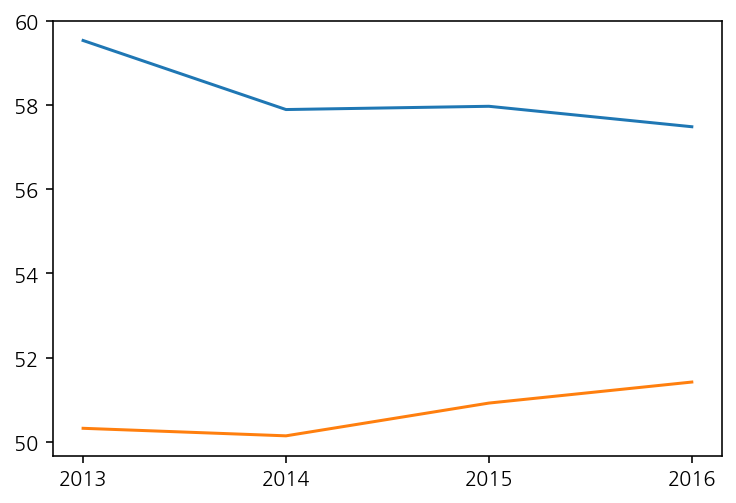

In [16]:
plt.plot(final_lee['년도'],final_lee['취업률'])
plt.plot(final_moon['년도'],final_moon['취업률'])

#학교별 문과 이과 취업률 비교

##전처리

In [17]:
data_2013=grd_2013.reset_index()
data_2013['대학']=data_2013['구분']
data_2013 = data_2013[['대학','구분','졸업자_계','취업자_계','건강보험가입취업자_계','건강보험가입교내취업자_계','해외취업자_계']]
data_2013.columns = ['대학','계열','졸업자','취업자','교외취업자','교내취업자','해외']
for i in range(1,len(data_2013['대학'])):
  if '대학'not in data_2013.loc[i,'대학']:
    data_2013.loc[i,'대학'] = None
data_2013.fillna(method='pad',inplace=True)

In [18]:
clean_2013_moon=data_2013[data_2013['계열'].str.contains('인문|사회')].iloc[3:]
clean_2013_moon.index = ['2013' for i in range(len(clean_2013_moon['계열']))]
clean_2013_lee=data_2013[data_2013['계열'].str.contains('공학|자연')].iloc[3:]
clean_2013_lee.index = ['2013' for i in range(len(clean_2013_lee['계열']))]

In [19]:
data_2014=grd_2014.reset_index()
data_2014['대학']=data_2014['구분']
data_2014 = data_2014[['대학','구분','졸업자_계','취업자_계','건강보험가입취업자_계','건강보험가입교내취업자_계','해외취업자_계']]
data_2014.columns = ['대학','계열','졸업자','취업자','교외취업자','교내취업자','해외']
for i in range(1,len(data_2014['대학'])):
  if '대학'not in data_2014.loc[i,'대학']:
    data_2014.loc[i,'대학'] = None
data_2014.fillna(method='pad',inplace=True)

In [20]:
clean_2014_moon=data_2014[data_2014['계열'].str.contains('인문|사회')].iloc[3:]
clean_2014_moon.index = ['2014' for i in range(len(clean_2014_moon['계열']))]
clean_2014_lee=data_2014[data_2014['계열'].str.contains('공학|자연')].iloc[3:]
clean_2014_lee.index = ['2014' for i in range(len(clean_2014_moon['계열']))]

In [21]:
data_2015=grd_2015.reset_index()
data_2015['대학']=data_2015['구분']
data_2015 = data_2015[['대학','구분','졸업자_계','취업자_합계','건강보험가입취업자_계','건강보험가입교내취업자_계','해외취업자_계']]
data_2015.columns = ['대학','계열','졸업자','취업자','교외취업자','교내취업자','해외']
for i in range(1,len(data_2015['대학'])):
  if '대학'not in data_2015.loc[i,'대학']:
    data_2015.loc[i,'대학'] = None
data_2015.fillna(method='pad',inplace=True)

In [22]:
clean_2015_moon=data_2015[data_2015['계열'].str.contains('인문|사회')].iloc[3:]
clean_2015_moon.index = ['2015' for i in range(len(clean_2015_moon['계열']))]
clean_2015_lee=data_2015[data_2015['계열'].str.contains('공학|자연')].iloc[3:]
clean_2015_lee.index = ['2015' for i in range(len(clean_2015_moon['계열']))]

In [23]:
data_2016=grd_2016.reset_index()
data_2016['대학']=data_2016['구분']
data_2016 = data_2016[['대학','구분','졸업자_계','취업자_합계','건강보험가입교외취업자_계','건강보험가입교내취업자_계','해외취업자_계']]
data_2016.columns = ['대학','계열','졸업자','취업자','교외취업자','교내취업자','해외']
for i in range(1,len(data_2016['대학'])):
  if '대학'not in data_2016.loc[i,'대학']:
    data_2016.loc[i,'대학'] = None
data_2016.fillna(method='pad',inplace=True)

In [24]:
clean_2016_moon=data_2016[data_2016['계열'].str.contains('인문|사회')].iloc[3:]
clean_2016_moon.index = ['2016' for i in range(len(clean_2016_moon['계열']))]
clean_2016_lee=data_2016[data_2016['계열'].str.contains('공학|자연')].iloc[3:]
clean_2016_lee.index = ['2016' for i in range(len(clean_2016_moon['계열']))]

In [25]:
lee = pd.concat([clean_2013_lee,clean_2014_lee,clean_2015_lee,clean_2016_lee])
moon = pd.concat([clean_2013_moon,clean_2014_moon,clean_2015_moon,clean_2016_moon])

In [26]:
lee['교외취업자']=pd.to_numeric(lee['교외취업자'],errors='coerce')
lee['교내취업자']=pd.to_numeric(lee['교내취업자'],errors='coerce')
lee['해외']=pd.to_numeric(lee['해외'],errors='coerce')
lee['졸업자']=pd.to_numeric(lee['졸업자'],errors='coerce')
lee.fillna(0,inplace=True)
lee['취업자'] = lee['교외취업자'] + lee['교내취업자'] + lee['해외']
moon['교외취업자']=pd.to_numeric(moon['교외취업자'],errors='coerce')
moon['교내취업자']=pd.to_numeric(moon['교내취업자'],errors='coerce')
moon['해외']=pd.to_numeric(moon['해외'],errors='coerce')
moon['졸업자']=pd.to_numeric(moon['졸업자'],errors='coerce')
moon.fillna(0,inplace=True)
moon['취업자'] = moon['교외취업자'] + moon['교내취업자'] + moon['해외']
moon['취업율'] = moon['취업자']/moon['졸업자'] * 100
moon_data = pd.DataFrame(moon.reset_index().groupby(['index','대학'])['취업율'].mean())
moon_data
lee['취업자'] = lee['교외취업자'] + lee['교내취업자'] + lee['해외']
lee['취업율'] = lee['취업자']/lee['졸업자'] * 100
lee_data = pd.DataFrame(lee.reset_index().groupby(['index','대학'])['취업율'].mean())
lee_data.reset_index()

,index,대학,취업율
0,2013,기능대학,77.911773
1,2013,대학,53.549893
2,2013,산업대학,57.097718
3,2013,일반대학원,64.465357
4,2013,전문대학,52.457281
5,2014,기능대학,78.826069
6,2014,대학,52.491141
7,2014,산업대학,64.526763
8,2014,일반대학원,62.484668
9,2014,전문대학,52.020649


##시각화

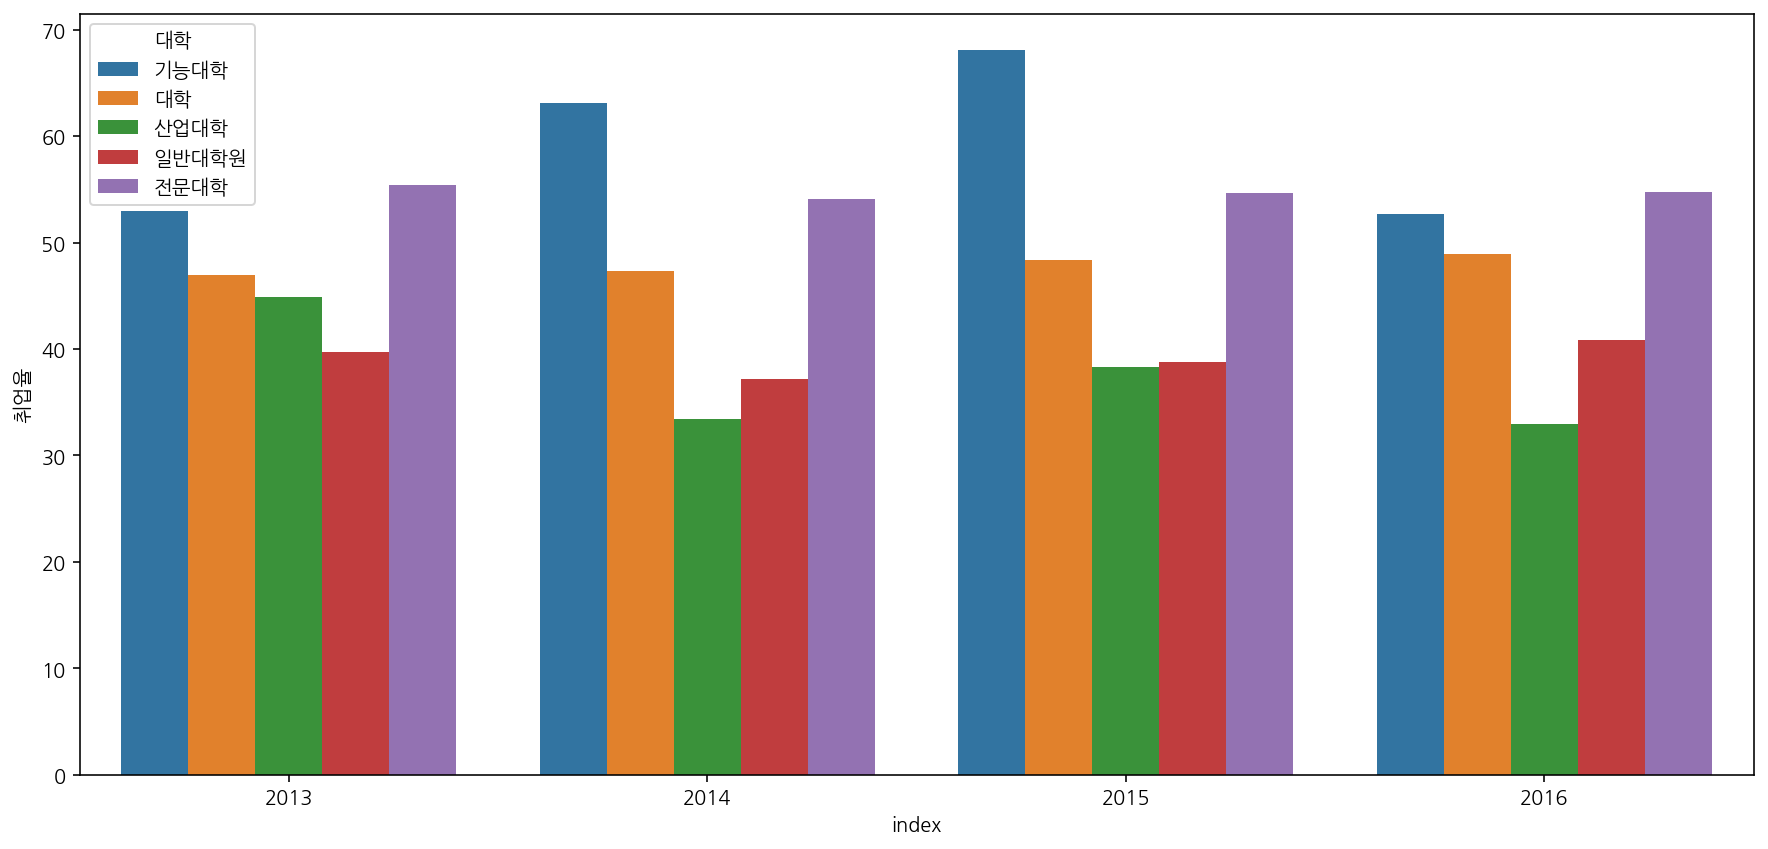

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(data=moon_data.reset_index(),x='index',y='취업율',hue='대학')

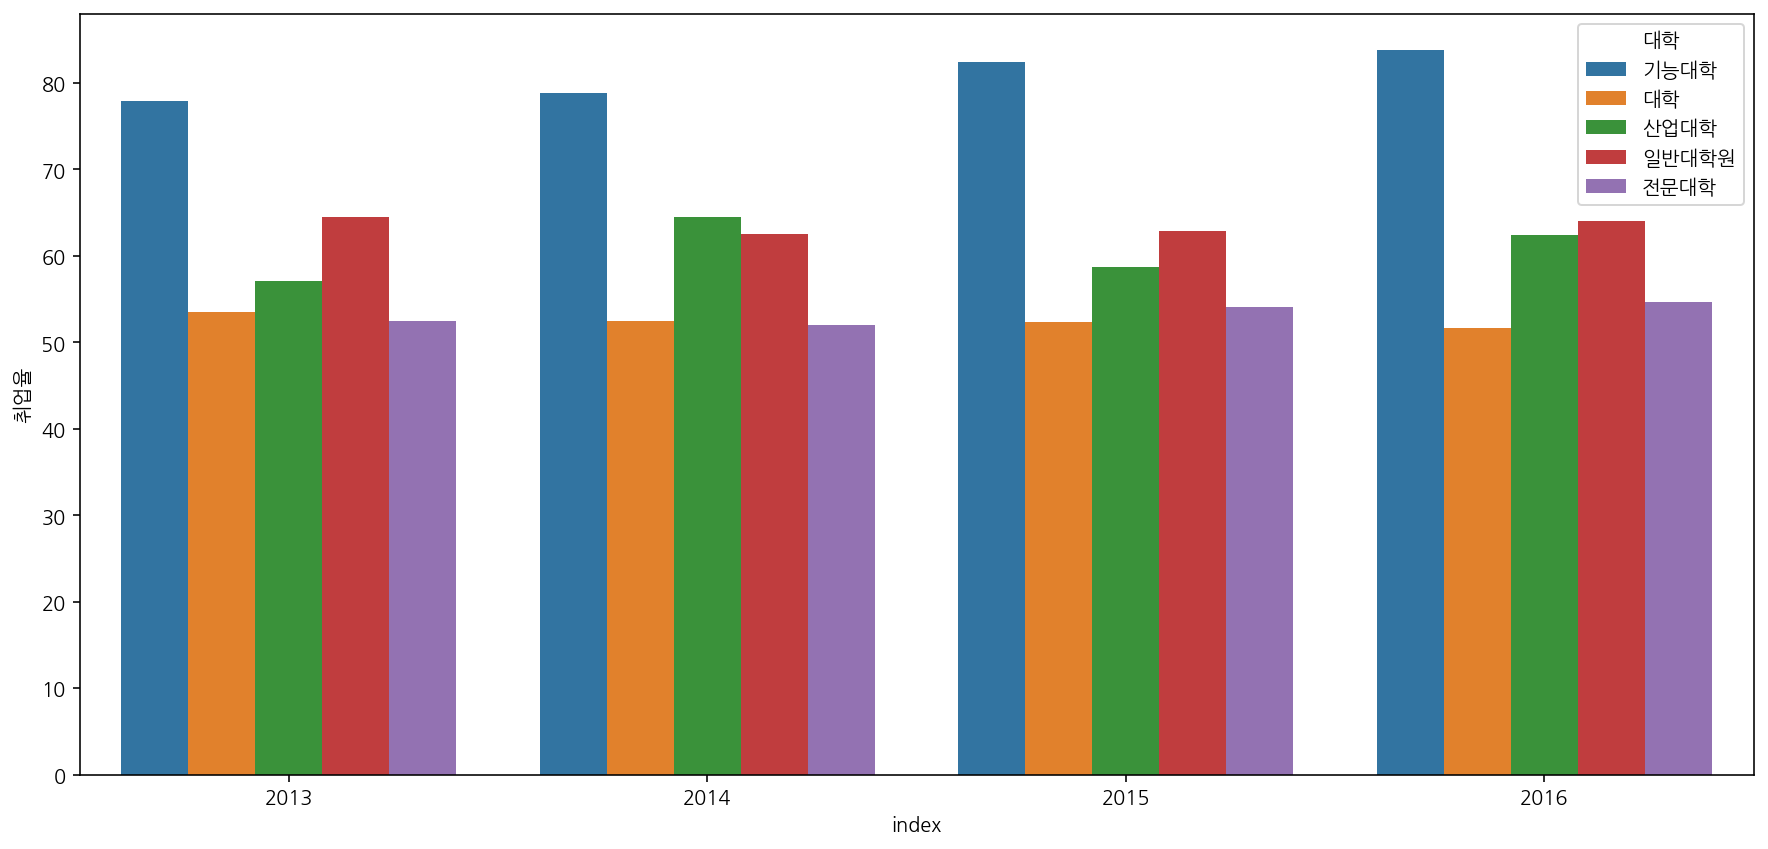

In [28]:
plt.figure(figsize=(15,7))
sns.barplot(data=lee_data.reset_index(),x='index',y='취업율',hue='대학')